In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn import linear_model
import statsmodels.api as sm
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
cd /content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Collective

/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Collective


In [5]:
#dataroh
df=pd.DataFrame()
os.chdir('/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Collective/data_roh')
filelist=os.listdir('/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Collective/data_roh')
DogID=[]
for i in filelist:
  DogID.append('S'+i.split('d-')[0])
  df=pd.concat([df,pd.read_fwf(i)])

In [6]:
#downsampledroh
os.chdir('/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Collective/downsampled_roh')
filelist=os.listdir('/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Collective/downsampled_roh')
for i in filelist:
  DogID.append('G'+i.split('_')[3].split('p')[0])
  df=pd.concat([df,pd.read_fwf(i)])
df['DogID']=DogID
df.set_index('DogID', inplace = True)

In [7]:
#import inbreeding file
os.chdir('/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Collective')
df1=pd.read_csv("processedinbreeding.het",delim_whitespace=True).set_index('FID')
dog_ids = []
for iid in df1['IID']:
    if "downsampled" in iid:
        dog_ids.append("G" + iid.split('_')[-1].replace('pct.bam', ''))
    else:
        dog_ids.append("S" + iid.split('bam/')[-1].split('d')[0])
df1['DogID'] = dog_ids
df1.set_index('DogID', inplace = True)
df =pd.concat([df,df1],axis=1)

/tmp/ipython-input-2337365084.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df1=pd.read_csv("processedinbreeding.het",delim_whitespace=True).set_index('FID')


In [8]:
df

,FID,IID,PHE,NSEG,KB,KBAVG,IID,O(HOM),E(HOM),N(NM),F
DogID,,,,,,,,,,,
S104,/u/home/g/gkislik/project-pellegrini/bam/104d-...,/u/home/g/gkislik/project-pellegrini/bam/104d-...,-9,290,2092890.0,7216.86,/u/home/g/gkislik/project-pellegrini/bam/104d-...,5857,5281.0,6183,0.63850
S108,/u/home/g/gkislik/project-pellegrini/bam/108d-...,/u/home/g/gkislik/project-pellegrini/bam/108d-...,-9,446,1076670.0,2414.07,/u/home/g/gkislik/project-pellegrini/bam/108d-...,13051,12940.0,15074,0.05257
S110,/u/home/g/gkislik/project-pellegrini/bam/110d-...,/u/home/g/gkislik/project-pellegrini/bam/110d-...,-9,459,1119030.0,2437.96,/u/home/g/gkislik/project-pellegrini/bam/110d-...,11836,11650.0,13585,0.09439
S106,/u/home/g/gkislik/project-pellegrini/bam/106d-...,/u/home/g/gkislik/project-pellegrini/bam/106d-...,-9,441,1708640.0,3874.47,/u/home/g/gkislik/project-pellegrini/bam/106d-...,9304,8733.0,10220,0.38400
S100,/u/home/g/gkislik/project-pellegrini/bam/100d-...,/u/home/g/gkislik/project-pellegrini/bam/100d-...,-9,566,1764250.0,3117.05,/u/home/g/gkislik/project-pellegrini/bam/100d-...,7136,6767.0,7904,0.32440
...,...,...,...,...,...,...,...,...,...,...,...
G5,/u/scratch/r/ryankim/downsampled_bams/GREATDAN...,/u/scratch/r/ryankim/downsampled_bams/GREATDAN...,-9,535,2024610.0,3784.33,/u/scratch/r/ryankim/downsampled_bams/GREATDAN...,43520,36910.0,48482,0.57120
G6,/u/scratch/r/ryankim/downsampled_bams/GREATDAN...,/u/scratch/r/ryankim/downsampled_bams/GREATDAN...,-9,591,1875800.0,3173.95,/u/scratch/r/ryankim/downsampled_bams/GREATDAN...,50057,43350.0,56842,0.49690
G7,/u/scratch/r/ryankim/downsampled_bams/GREATDAN...,/u/scratch/r/ryankim/downsampled_bams/GREATDAN...,-9,640,1699230.0,2655.05,/u/scratch/r/ryankim/downsampled_bams/GREATDAN...,56295,49830.0,65285,0.41810


In [9]:
#dataqc
os.chdir('/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Collective/data_qc')
filelist=os.listdir('/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Collective/data_qc')
average_coverage={}
for i in filelist:
  df_qc=pd.read_table(i)
  average_coverage['S'+i.split('d-')[0]]=df_qc['meandepth'].mean()

In [10]:
#downsampledqc
os.chdir('/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Collective/downsampled_qc')
filelist=os.listdir('/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Collective/downsampled_qc')
for i in filelist:
  df_qc=pd.read_table(i)
  average_coverage["G"+i.split('_')[3].split("p")[0]]=df_qc['meandepth'].mean()
df['meandepth'] = df.index.map(average_coverage)

In [11]:
#maketable
df=df[['KB','meandepth','F']]

In [12]:
mask = df.index.to_series().apply(
    lambda x: int(x[1:]) <= 23 if x.startswith('G') else True
)
df_filtered = df[mask]

array([[<Axes: xlabel='KB', ylabel='KB'>,
        <Axes: xlabel='meandepth', ylabel='KB'>,
        <Axes: xlabel='F', ylabel='KB'>],
       [<Axes: xlabel='KB', ylabel='meandepth'>,
        <Axes: xlabel='meandepth', ylabel='meandepth'>,
        <Axes: xlabel='F', ylabel='meandepth'>],
       [<Axes: xlabel='KB', ylabel='F'>,
        <Axes: xlabel='meandepth', ylabel='F'>,
        <Axes: xlabel='F', ylabel='F'>]], dtype=object)

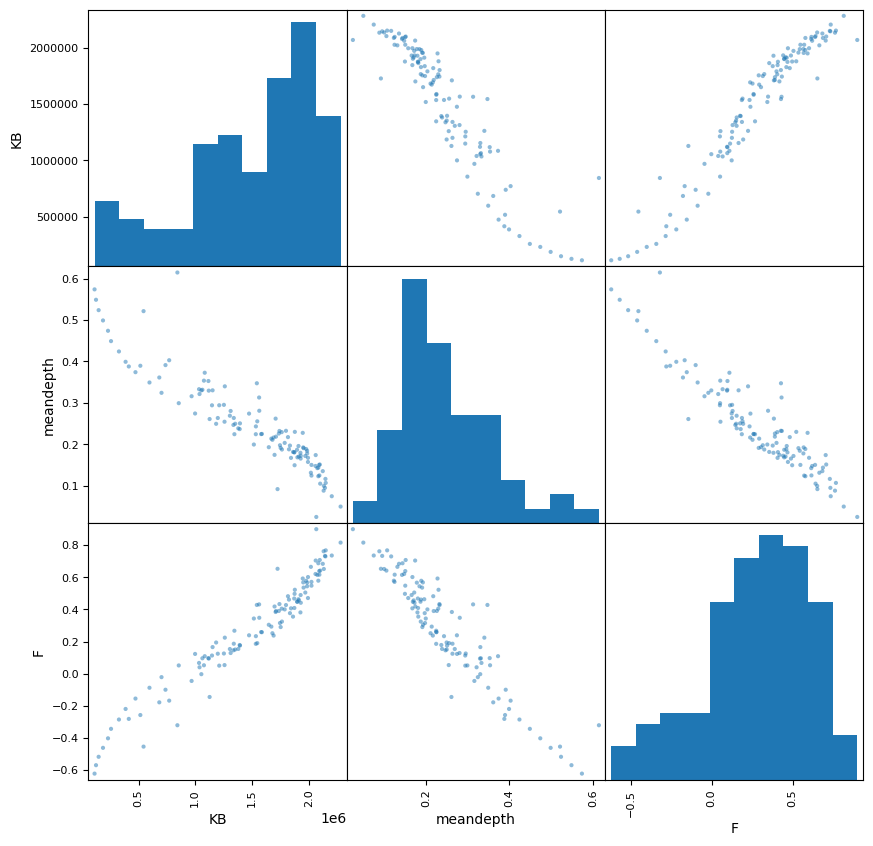

In [13]:
pd.plotting.scatter_matrix(df_filtered,figsize=(10,10))

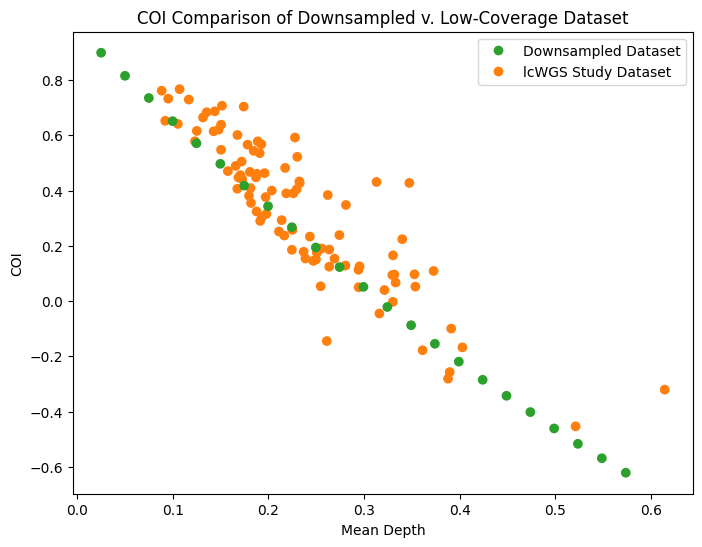

In [25]:
colors = df_filtered.index.to_series().apply(
    lambda x: '#2ca02c' if x.startswith('G') else '#ff7f0e' if x.startswith('S') else 'gray'
)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['meandepth'], df_filtered['F'], c=colors)

# Add labels and title
plt.xlabel('Mean Depth')
plt.ylabel('COI')
plt.title('COI Comparison of Downsampled v. Low-Coverage Dataset')

# Optional: legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Downsampled Dataset', markerfacecolor='#2ca02c', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='lcWGS Study Dataset',markerfacecolor='#ff7f0e', markersize=8)
]
plt.legend(handles=legend_elements)

plt.show()